<a href="https://colab.research.google.com/github/Puttu710/Tom-Jerry-Emotion-detection/blob/master/tom_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [0]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path = "/content/drive/My Drive/tom&jerry"
import os
for dirname, _, filenames in os.walk('/content/drive/My Drive/tom&jerry'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        from zipfile import ZipFile

file_name="/content/drive/My Drive/tom&jerry/test.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('unzip test Done')

file_name="/content/drive/My Drive/tom&jerry/train.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('unzip train Done')



/content/drive/My Drive/tom&jerry/train.zip
/content/drive/My Drive/tom&jerry/test.zip
/content/drive/My Drive/tom&jerry/sample_submission.csv
/content/drive/My Drive/tom&jerry/test.csv
/content/drive/My Drive/tom&jerry/train.csv
unzip test Done
unzip train Done


In [0]:
import cv2
import keras
from skimage import io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
from tensorflow.python.keras import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

Using TensorFlow backend.


In [0]:
df_test = pd.read_csv('/content/drive/My Drive/tom&jerry/test.csv')
df_train = pd.read_csv('/content/drive/My Drive/tom&jerry/train.csv')
# np.unique(df_train['Emotion'])
df_test.shape    #(275,1)
df_train.shape

(1941, 2)

In [0]:
df_test.head(5)

,image_file
0,IMG_10000000f
1,IMG_10000013f
2,IMG_10000018f
3,IMG_10000030f
4,IMG_10000032f


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


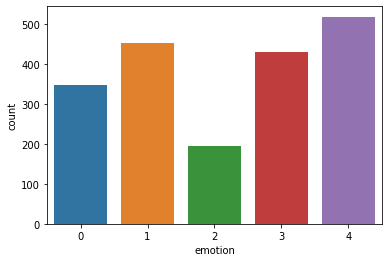

In [0]:
import seaborn as sns
sns.countplot(df_train['emotion'])

In [0]:
train_image_file = df_train['image_file'].to_list()
train_emotion = df_train['emotion'].to_list()#train_label
print(train_image_file)

['IMG_10000000fn', 'IMG_10000000n', 'IMG_10000004f', 'IMG_10000004fn', 'IMG_10000004n', 'IMG_10000010f', 'IMG_10000010fn', 'IMG_10000010n', 'IMG_10000013fn', 'IMG_10000013n', 'IMG_10000016f', 'IMG_10000016fn', 'IMG_10000016n', 'IMG_10000017f', 'IMG_10000017fn', 'IMG_10000017n', 'IMG_10000018fn', 'IMG_10000018n', 'IMG_10000019f', 'IMG_10000019fn', 'IMG_10000019n', 'IMG_10000023f', 'IMG_10000023fn', 'IMG_10000023n', 'IMG_10000024f', 'IMG_10000024fn', 'IMG_10000024n', 'IMG_10000029f', 'IMG_10000029fn', 'IMG_10000029n', 'IMG_10000030fn', 'IMG_10000030n', 'IMG_10000031f', 'IMG_10000031fn', 'IMG_10000031n', 'IMG_10000032fn', 'IMG_10000032n', 'IMG_10000038fn', 'IMG_10000038n', 'IMG_10000039f', 'IMG_10000039fn', 'IMG_10000039n', 'IMG_10000047fn', 'IMG_10000047n', 'IMG_10000048fn', 'IMG_10000048n', 'IMG_10000049fn', 'IMG_10000049n', 'IMG_10000050fn', 'IMG_10000050n', 'IMG_10000051f', 'IMG_10000051fn', 'IMG_10000051n', 'IMG_10000052f', 'IMG_10000052fn', 'IMG_10000052n', 'IMG_10000053f', 'IMG_100

In [0]:
df_train['emotion'].count()
df_test['image_file'].count()

275

In [0]:
from tqdm import tqdm
train_data = []
for i in tqdm(os.listdir('/content/ntrain')):
    path = '/content/ntrain/{}'.format(i)
    if '.jpg' in path:
        grayscale = cv2.resize(cv2.imread(path, cv2.IMREAD_UNCHANGED), (180, 90))
        grayscale = rgb2gray(grayscale)
        train_data.append(grayscale.reshape(1,-1)[0])
train_data = np.array(train_data)
train_data.shape



100%|██████████| 1941/1941 [00:09<00:00, 206.85it/s]


(1941, 16200)

In [0]:
def catagorical_data(train_label,validation_label):
    total_class = len(np.unique(train_label))
    train_label = keras.utils.to_categorical(train_label, total_class)
    validation_label = keras.utils.to_categorical(validation_label, total_class)
    return train_label,validation_label,total_class

In [0]:
train_data, validation_data, train_label, validation_label = train_test_split(train_data, train_emotion, test_size=0.2, random_state=1)

In [0]:
# plt.imshow(train_data[0].reshape(90, 160), cmap='gray')
# print('label ',train_emotion[0])

In [0]:
train_data = train_data.reshape(train_data.shape[0], 90, 180, 1)
validation_data = validation_data.reshape(validation_data.shape[0], 90, 180, 1)
print('train shape :', train_data.shape)
print('validation shape :',validation_data.shape)

train shape : (1552, 90, 180, 1)
validation shape : (389, 90, 180, 1)


In [0]:
train_label,validation_label,total_class = catagorical_data(train_label,validation_label)

In [0]:
model_cnn = Sequential()
model_cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(90, 180, 1)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cnn.add(Dropout(0.25))
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(total_class, activation='softmax'))
# model_cnn.summary()

In [0]:
model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
model_cnn.fit(train_data, train_label, batch_size = 32, epochs = 60, verbose = 1)

Epoch 1/60
49/49 [==============================] - 1s 25ms/step - loss: 1.8891 - accuracy: 0.2378
Epoch 2/60
49/49 [==============================] - 1s 23ms/step - loss: 1.5880 - accuracy: 0.2584
Epoch 3/60
49/49 [==============================] - 1s 23ms/step - loss: 1.5720 - accuracy: 0.2706
Epoch 4/60
49/49 [==============================] - 1s 23ms/step - loss: 1.5311 - accuracy: 0.3151
Epoch 5/60
49/49 [==============================] - 1s 23ms/step - loss: 1.4404 - accuracy: 0.3860
Epoch 6/60
49/49 [==============================] - 1s 23ms/step - loss: 1.3091 - accuracy: 0.4601
Epoch 7/60
49/49 [==============================] - 1s 23ms/step - loss: 1.1838 - accuracy: 0.5264
Epoch 8/60
49/49 [==============================] - 1s 23ms/step - loss: 1.0529 - accuracy: 0.5896
Epoch 9/60
49/49 [==============================] - 1s 23ms/step - loss: 0.9564 - accuracy: 0.6218
Epoch 10/60
49/49 [==============================] - 1s 23ms/step - loss: 0.8464 - accuracy: 0.6669
Epoch 11/

In [0]:
test_image_file = df_test['image_file'].to_list()

In [0]:
test_data = []
for i in tqdm(os.listdir('/content/ntest')):
    path = '/content/ntest/{}'.format(i)
    if '.jpg' in path:
        grayscale = cv2.resize(cv2.imread(path, cv2.IMREAD_UNCHANGED), (180, 90))
        grayscale = rgb2gray(grayscale)
        test_data.append(grayscale.reshape(1,-1)[0])
test_data = np.array(test_data)
test_data.shape

100%|██████████| 275/275 [00:01<00:00, 273.30it/s]


(275, 16200)

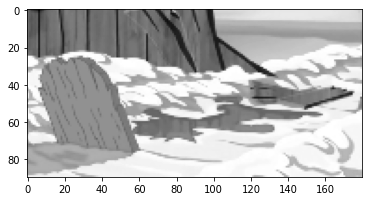

In [0]:
plt.imshow(test_data[0].reshape(90, 180), cmap='gray')

In [0]:
test_data = test_data.reshape(test_data.shape[0], 90, 180, 1)
y_pred = model_cnn.predict(test_data, verbose=0)
y_classes = y_pred.argmax(axis=-1).tolist()
ans = pd.DataFrame(y_classes, columns=['emotion'])
ans.head()

,emotion
0,4
1,4
2,0
3,1
4,3


In [0]:
ans.to_csv('submission.csv', index=None)